In [41]:
# Import Libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Load the dataset
df = pd.read_csv('iPhone_sales_revenue.csv')
df.set_index('Year', inplace=True)

# Split the data
train = df.loc[:2021]
test = df.loc[2022]



In [42]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Initialize the best parameters and the best MSE for sales
best_pdq_sales = None
best_mse_sales = float('inf')



In [43]:
# Grid search for sales
for param in pdq:
    try:
        model = ARIMA(train['Sales (mm)'], order=param)
        model_fit = model.fit()
        sales_forecast = model_fit.forecast(steps=1).values[0]
        mse = mean_squared_error(np.array([test['Sales (mm)']]), np.array([sales_forecast]))
        if mse < best_mse_sales:
            best_mse_sales = mse
            best_pdq_sales = param
    except:
        continue

# Initialize the best parameters and the best MSE for revenue
best_pdq_revenue = None
best_mse_revenue = float('inf')

# Grid search for revenue
for param in pdq:
    try:
        model = ARIMA(train['Revenue ($bn)'], order=param)
        model_fit = model.fit()
        revenue_forecast = model_fit.forecast(steps=1).values[0]
        mse = mean_squared_error(np.array([test['Revenue ($bn)']]), np.array([revenue_forecast]))
        if mse < best_mse_revenue:
            best_mse_revenue = mse
            best_pdq_revenue = param
    except:
        continue




In [44]:
# Print the best parameters and the corresponding MSE
print('Best ARIMA parameters for Sales: ', best_pdq_sales)
print('Best MSE for Sales: ', best_mse_sales)
print('Best ARIMA parameters for Revenue: ', best_pdq_revenue)
print('Best MSE for Revenue: ', best_mse_revenue)



Best ARIMA parameters for Sales:  (2, 0, 1)
Best MSE for Sales:  6.945931125326958
Best ARIMA parameters for Revenue:  (1, 1, 1)
Best MSE for Revenue:  0.10059556169480245


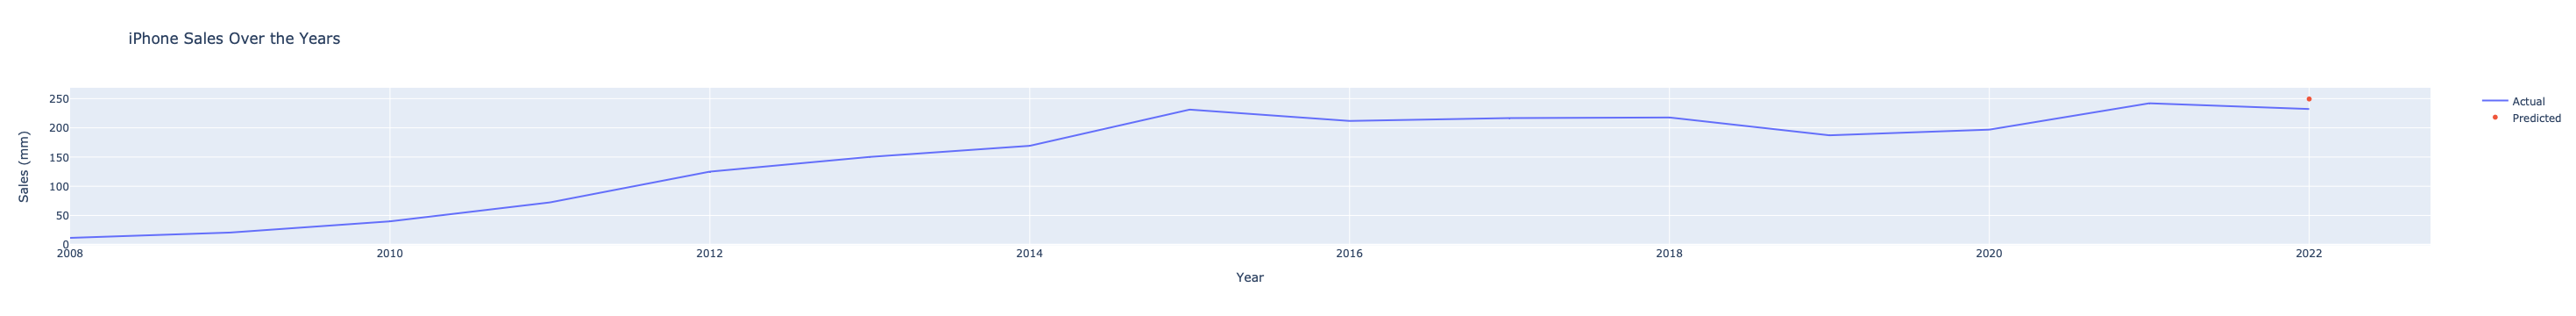

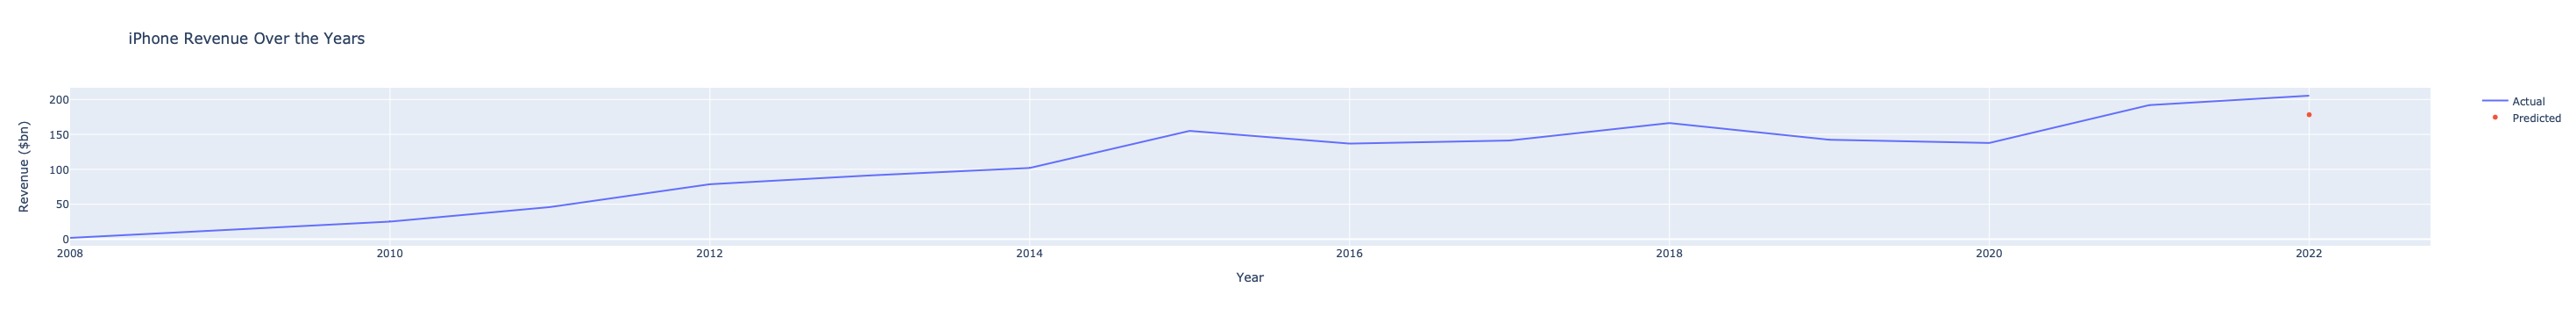

In [45]:
# Visualization
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df.index, y=df['Sales (mm)'], mode='lines', name='Actual'))
fig1.add_trace(go.Scatter(x=[2022], y=[sales_forecast], mode='markers', name='Predicted'))
fig1.update_layout(title='iPhone Sales Over the Years', xaxis_title='Year', yaxis_title='Sales (mm)')
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df.index, y=df['Revenue ($bn)'], mode='lines', name='Actual'))
fig2.add_trace(go.Scatter(x=[2022], y=[revenue_forecast], mode='markers', name='Predicted'))
fig2.update_layout(title='iPhone Revenue Over the Years', xaxis_title='Year', yaxis_title='Revenue ($bn)')
fig2.show()